In [39]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn import metrics
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import numpy as np
import itertools
from sklearn.preprocessing import Normalizer
import xgboost

In [2]:
data = pd.read_csv("../Data/processed_data.csv")
data.columns

Index(['Unnamed: 0', 'age', 'resting_blood_pressure', 'serum_cholestoral',
       'maximum_heart_rate_achieved',
       'depression_induced_by_exercise_relative_to_rest',
       'number_of_major_vessels', 'target', 'female', 'typical_angina',
       'atypical_angina', 'non_anginal_pain', 'asymptomatic', 'above_120',
       'normal', 'ST_T_abnormality', 'showing_probable',
       'yes_exercise_induced_angina', 'upsloping', 'flat', 'downsloping',
       'normal.1', 'fixed_defect', 'revesable_defect'],
      dtype='object')

In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data = shuffle(data)

In [5]:
#scaler = Normalizer()

In [6]:
target = data['target']
data = data.drop("target", axis=1)
print("{}\n{}".format(data.shape, target.shape))

(296, 22)
(296,)


In [7]:
#normalised_df = scaler.fit_transform(data)
#normalised_df = pd.DataFrame(normalised_df, columns=data.columns)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.333, random_state=42)

In [9]:
print("Train set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_test.shape)

Train set:  (197, 22) (197,)
Test set:  (99, 22) (99,)


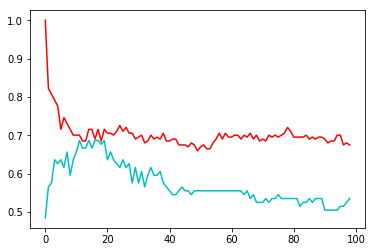

In [10]:
Test_accuracy = []
Train_accuracy = []
for i in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    y_hat = neigh.predict(x_test)
    Test_accuracy.append(metrics.accuracy_score(y_train, neigh.predict(x_train)))
    Train_accuracy.append(metrics.accuracy_score(y_test, y_hat))
plt.plot(Test_accuracy, color="r")
plt.plot(Train_accuracy, color="c")

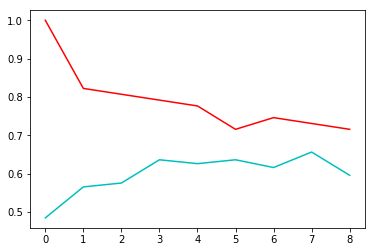

In [32]:
Test_accuracy = []
Train_accuracy = []
for i in range(1, 10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    y_hat = neigh.predict(x_test)
    Test_accuracy.append(metrics.accuracy_score(y_train, neigh.predict(x_train)))
    Train_accuracy.append(metrics.accuracy_score(y_test, y_hat))
    #cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
    #plot_confusion_matrix(cm, classes=[0, 1])
plt.plot(Test_accuracy, color="r")
plt.plot(Train_accuracy, color="c")

In [12]:
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

LogisticRegression
Train set Accuracy:  0.8934010152284264
Test set Accuracy:  0.8282828282828283
Confusion matrix, without normalization
[[40 12]
 [ 5 42]]


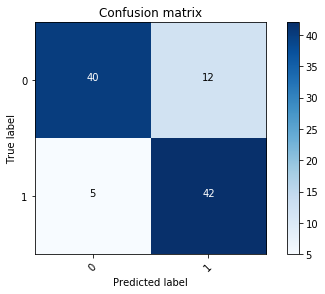

In [13]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
yhat = LR.predict(x_test)
print("LogisticRegression")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

BernoulliNB
Train set Accuracy:  0.8324873096446701
Test set Accuracy:  0.8282828282828283
Confusion matrix, without normalization
[[43  9]
 [ 8 39]]


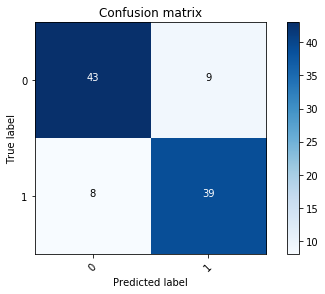

In [14]:
RC = BernoulliNB()
RC.fit(x_train,y_train)
yhat = RC.predict(x_test)
print("BernoulliNB")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, RC.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

MultinomialNB
Train set Accuracy:  0.7868020304568528
Test set Accuracy:  0.7676767676767676
Confusion matrix, without normalization
[[35 17]
 [ 6 41]]


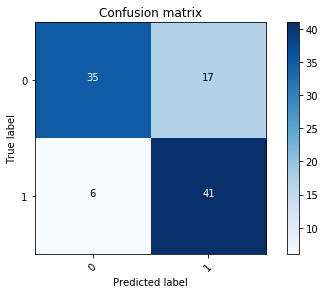

In [15]:
RC = MultinomialNB()
RC.fit(x_train,y_train)
yhat = RC.predict(x_test)
print("MultinomialNB")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, RC.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

 GaussianNB
Train set Accuracy:  0.8527918781725888
Test set Accuracy:  0.797979797979798
Confusion matrix, without normalization
[[42 10]
 [10 37]]


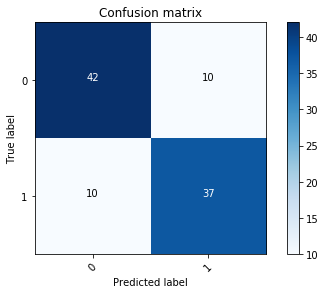

In [16]:
RC = GaussianNB()
RC.fit(x_train,y_train)
yhat = RC.predict(x_test)
print(" GaussianNB")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, RC.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

LinearSVC
Train set Accuracy:  0.8274111675126904
Test set Accuracy:  0.7171717171717171
Confusion matrix, without normalization
[[27 25]
 [ 3 44]]


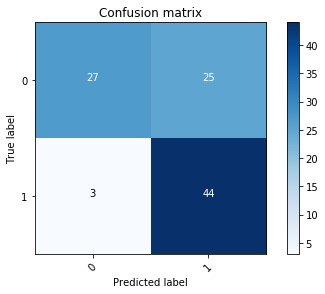

In [17]:
RC = LinearSVC()
RC.fit(x_train,y_train)
yhat = RC.predict(x_test)
print("LinearSVC")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, RC.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

In [18]:
'''
NSVC = NuSVC()
NSVC.fit(x_train, y_train)
yhat = NSVC.predict(x_test)
print("NuSVC")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, NSVC.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
#plot_confusion_matrix(cm, classes=[0, 1])
print(cm)
'''

'\nNSVC = NuSVC()\nNSVC.fit(x_train, y_train)\nyhat = NSVC.predict(x_test)\nprint("NuSVC")\nprint("Train set Accuracy: ", metrics.accuracy_score(y_train, NSVC.predict(x_train)))\nprint("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))\ncm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])\n#plot_confusion_matrix(cm, classes=[0, 1])\nprint(cm)\n'

SVC
Train set Accuracy:  1.0
Test set Accuracy:  0.494949494949495
Confusion matrix, without normalization
[[ 2 50]
 [ 0 47]]


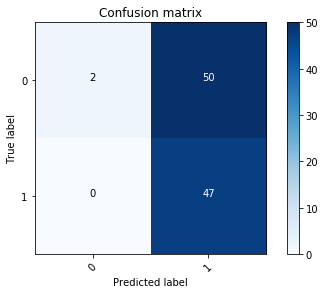

In [19]:
RC = SVC()
RC.fit(x_train,y_train)
yhat = RC.predict(x_test)
print("SVC")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, RC.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

AdaBoostClassifier
Train set Accuracy:  0.9543147208121827
Test set Accuracy:  0.8080808080808081
Confusion matrix, without normalization
[[40 12]
 [ 7 40]]


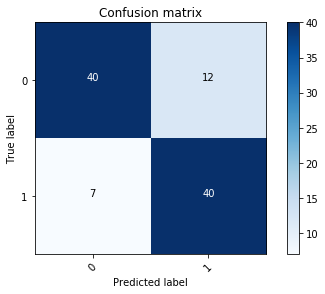

In [20]:
Ada = AdaBoostClassifier()
Ada.fit(x_train, y_train)
yhat = Ada.predict(x_test)
print("AdaBoostClassifier")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Ada.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

GradientBoostingClassifier
Train set Accuracy:  1.0
Test set Accuracy:  0.7878787878787878
Confusion matrix, without normalization
[[38 14]
 [ 7 40]]


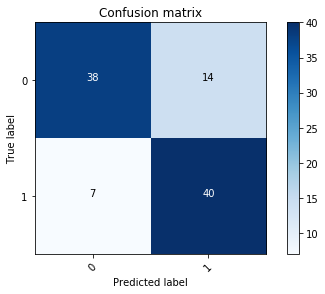

In [21]:
Gboost = GradientBoostingClassifier()
Gboost.fit(x_train, y_train)
yhat = Gboost.predict(x_test)
print("GradientBoostingClassifier")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Gboost.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

RandomForestClassifier
Train set Accuracy:  0.9949238578680203
Test set Accuracy:  0.7676767676767676
Confusion matrix, without normalization
[[38 14]
 [ 9 38]]


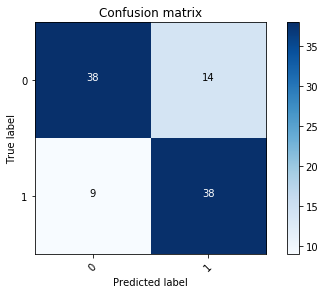

In [22]:
RForest = RandomForestClassifier()
RForest.fit(x_train, y_train)
yhat = RForest.predict(x_test)
print("RandomForestClassifier")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, RForest.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

DecisionTreeClassifier
Train set Accuracy:  0.8629441624365483
Test set Accuracy:  0.7272727272727273
Confusion matrix, without normalization
[[34 18]
 [ 9 38]]


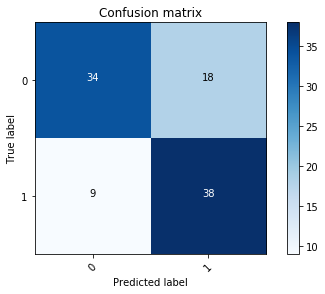

In [30]:
DTree = DecisionTreeClassifier(max_depth=3)
DTree.fit(x_train, y_train)
yhat = DTree.predict(x_test)
print("DecisionTreeClassifier")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DTree.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

ExtraTreeClassifier
Train set Accuracy:  0.8071065989847716
Test set Accuracy:  0.797979797979798
Confusion matrix, without normalization
[[41 11]
 [ 9 38]]


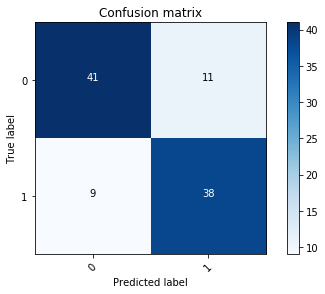

In [29]:
ETree = ExtraTreeClassifier(max_depth=3)
ETree.fit(x_train, y_train)
yhat = ETree.predict(x_test)
print("ExtraTreeClassifier")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, ETree.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

In [35]:
xgb = xgboost.XGBClassifier()

C:\Users\0x6f736f646f\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\0x6f736f646f\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


xgboost
Train set Accuracy:  0.9898477157360406
Test set Accuracy:  0.8080808080808081
Confusion matrix, without normalization
[[39 13]
 [ 6 41]]


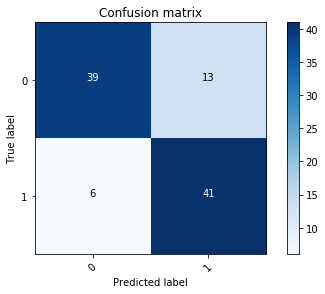

In [37]:
xgb.fit(x_train, y_train)
yhat = xgb.predict(x_test)
print("xgboost")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, xgb.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)

# Hyperparamter optimization

In [ ]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
yhat = LR.predict(x_test)
print("LogisticRegression")
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
cm = metrics.confusion_matrix(y_test, yhat, labels=[0,1])
plot_confusion_matrix(cm, classes=[0, 1])
print(cm)